In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
DATA = pd.read_csv("../DATA/MODISaqua_monthly.csv", sep=",")

In [32]:
DATA.info

<bound method DataFrame.info of        year  month  day        lon        lat     value     unit      var  \
0      2002      8   19 -64.978897  10.861279  0.183035  mg m^-3  chlor_a   
1      2002      8   19 -64.936699  10.861279  0.190779  mg m^-3  chlor_a   
2      2002      8   19 -64.894501  10.861279  0.200634  mg m^-3  chlor_a   
3      2002      8   19 -64.852303  10.861279  0.200367  mg m^-3  chlor_a   
4      2002      8   19 -64.810097  10.861279  0.190102  mg m^-3  chlor_a   
...     ...    ...  ...        ...        ...       ...      ...      ...   
31315  2021     11   16 -64.556900  10.513721  0.314559  mg m^-3  chlor_a   
31316  2021     11   16 -64.514694  10.513721  0.362557  mg m^-3  chlor_a   
31317  2021     11   16 -64.472496  10.513721  0.496117  mg m^-3  chlor_a   
31318  2021     11   16 -64.430298  10.513721  0.792717  mg m^-3  chlor_a   
31319  2021     11   16 -64.388100  10.513721  1.057264  mg m^-3  chlor_a   

      date_string  
0       2002-8-19  
1  

In [34]:
DATA['date_string'] = DATA.year.astype(str) + "-" + \
                DATA.month.astype(str) + "-" + DATA.day.astype(str)

In [35]:
pd.to_datetime(DATA['date_string'])

0       2002-08-19
1       2002-08-19
2       2002-08-19
3       2002-08-19
4       2002-08-19
           ...    
31315   2021-11-16
31316   2021-11-16
31317   2021-11-16
31318   2021-11-16
31319   2021-11-16
Name: date_string, Length: 31320, dtype: datetime64[ns]

In [36]:
DATA['date'] = pd.to_datetime(DATA['date_string'])

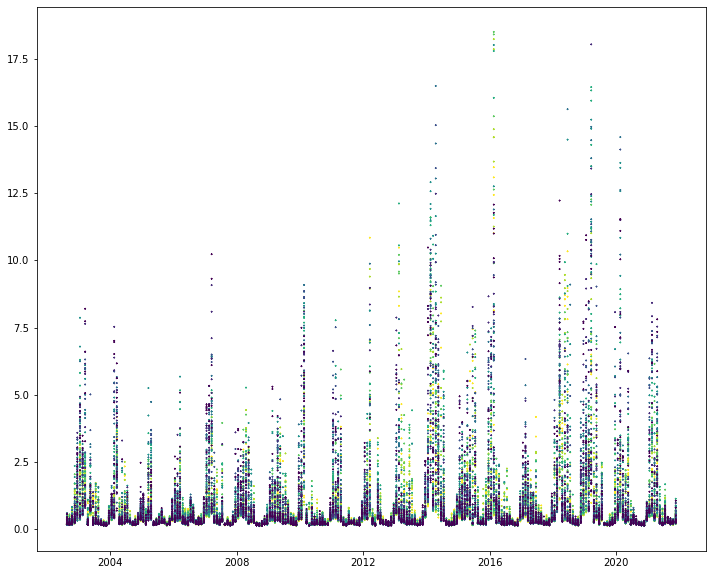

In [43]:

plt.rcParams['figure.figsize'] = [12, 10]
plt.scatter(DATA['date'], DATA['value'], marker='x', c=DATA['lat'], s=1)

In [46]:
DATA_2 = DATA.set_index('date')

In [49]:
DATA_monthly_mean = DATA_2.resample('M').mean()
DATA_monthly_median = DATA_2.resample('M').median()

In [51]:
DATA_monthly_mean

,year,month,day,lon,lat,value
date,,,,,,
2002-08-31,2002.0,8.0,19.0,-64.683499,10.6875,0.257060
2002-09-30,2002.0,9.0,16.0,-64.683499,10.6875,0.221823
2002-10-31,2002.0,10.0,16.0,-64.683499,10.6875,0.308338
2002-11-30,2002.0,11.0,16.0,-64.683499,10.6875,0.554162
2002-12-31,2002.0,12.0,16.0,-64.683499,10.6875,1.339490
...,...,...,...,...,...,...
2021-07-31,2021.0,7.0,16.0,-64.683499,10.6875,0.512693
2021-08-31,2021.0,8.0,16.0,-64.683499,10.6875,0.281842
2021-09-30,2021.0,9.0,16.0,-64.683499,10.6875,0.224667


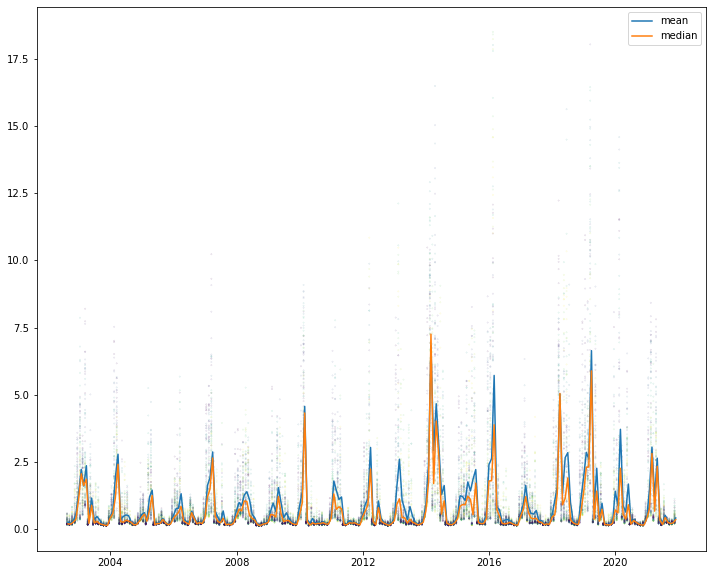

In [61]:
plt.plot(DATA_monthly_mean.index, DATA_monthly_mean['value'], label='mean')
plt.plot(DATA_monthly_median.index, DATA_monthly_median['value'], label='median')
plt.scatter(DATA['date'], DATA['value'], marker='x', c=DATA['lat'], s=1, alpha=0.1)
plt.legend()

# Now Read SeaWiFS

In [62]:
SeaWiFS = pd.read_csv("../DATA/SeaWiFS_monthly.csv", sep=",")

In [63]:
SeaWiFS['date_string'] = SeaWiFS.year.astype(str) + "-" + \
                SeaWiFS.month.astype(str) + "-" + SeaWiFS.day.astype(str)

In [64]:
pd.to_datetime(SeaWiFS['date_string'])

0      1997-10-16
1      1997-10-16
2      1997-10-16
3      1997-10-16
4      1997-10-16
          ...    
6075   2010-12-05
6076   2010-12-05
6077   2010-12-05
6078   2010-12-05
6079   2010-12-05
Name: date_string, Length: 6080, dtype: datetime64[ns]

In [65]:
SeaWiFS['date'] = pd.to_datetime(SeaWiFS['date_string'])

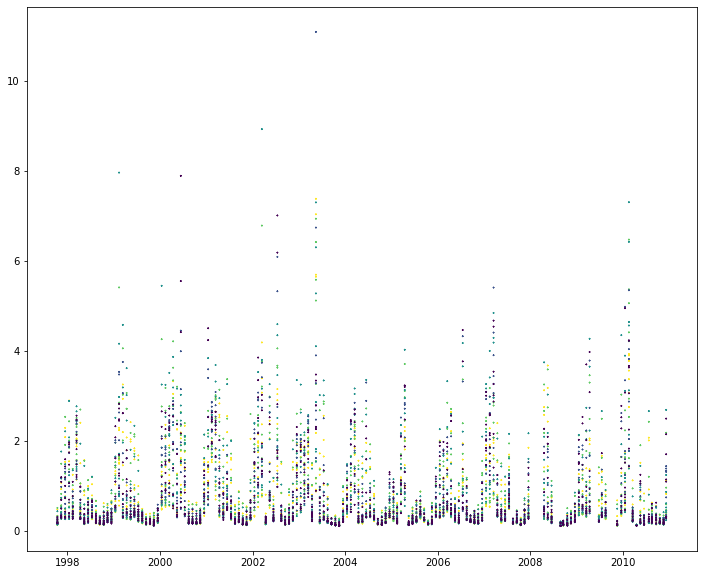

In [66]:

plt.rcParams['figure.figsize'] = [12, 10]
plt.scatter(SeaWiFS['date'], SeaWiFS['value'], marker='x', c=SeaWiFS['lat'], s=1)

In [67]:
SeaWiFS_2 = SeaWiFS.set_index('date')

In [68]:
SeaWiFS_monthly_mean = SeaWiFS_2.resample('M').mean()
SeaWiFS_monthly_median = SeaWiFS_2.resample('M').median()

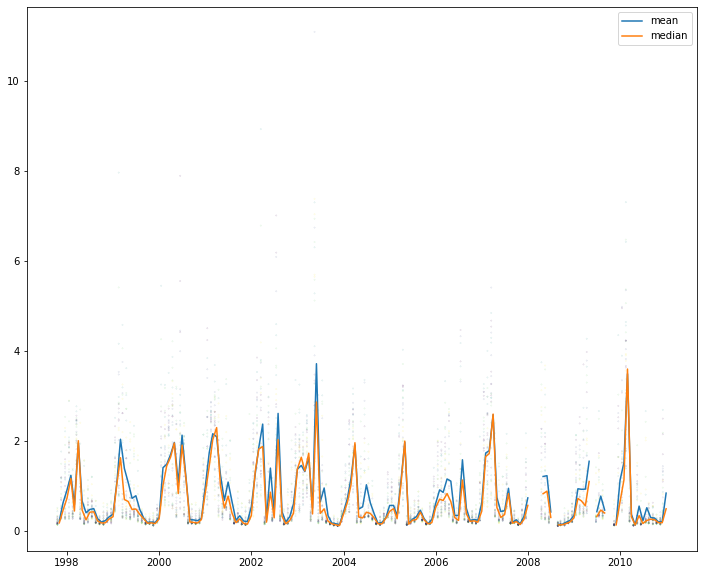

In [69]:
plt.plot(SeaWiFS_monthly_mean.index, SeaWiFS_monthly_mean['value'], label='mean')
plt.plot(SeaWiFS_monthly_median.index, SeaWiFS_monthly_median['value'], label='median')
plt.scatter(SeaWiFS['date'], SeaWiFS['value'], marker='x', c=SeaWiFS['lat'], s=1, alpha=0.1)
plt.legend()

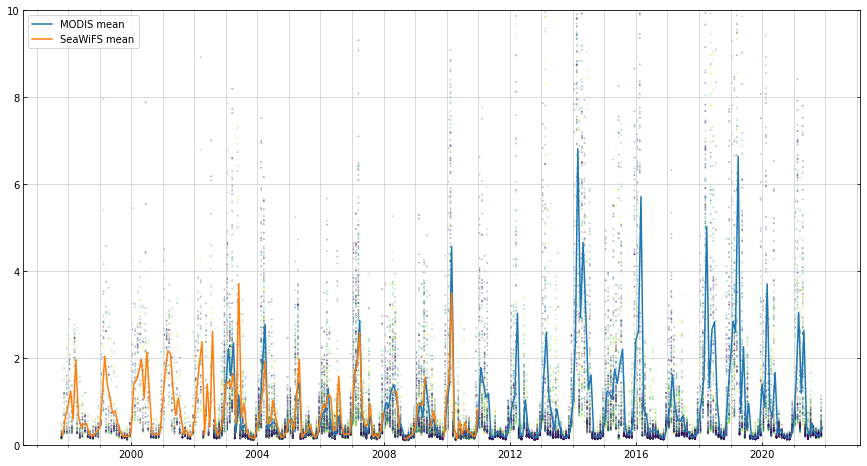

In [83]:
plt.rcParams['figure.figsize'] = [15, 8]

import matplotlib.dates as mdates

plt.axes().xaxis.set_minor_locator(mdates.YearLocator())

plt.grid(True,which='both', color='lightgrey')
plt.tick_params(top=False, right=True, direction="in")

plt.plot(DATA_monthly_mean.index, DATA_monthly_mean['value'], label='MODIS mean')
#plt.plot(DATA_monthly_median.index, DATA_monthly_median['value'], label='MODIS median')
plt.scatter(DATA['date'], DATA['value'], marker='x', c=DATA['lat'], s=1, alpha=0.3)

plt.plot(SeaWiFS_monthly_mean.index, SeaWiFS_monthly_mean['value'], label='SeaWiFS mean')
#plt.plot(SeaWiFS_monthly_median.index, SeaWiFS_monthly_median['value'], label='SeaWiFS median')
plt.scatter(SeaWiFS['date'], SeaWiFS['value'], marker='x', c=SeaWiFS['lat'], s=1, alpha=0.3)

plt.ylim(0,10)
plt.legend()
plt.savefig("QuickSatViz.png")